In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
d = torch.load("/nfs/turbo/lsa-regier/scratch/ismael/data/blendsim.pt")

In [ ]:
d

{'residuals': {'snr': tensor([ 6.6336,  6.0599,  3.8879,  ..., 15.4886, 18.5095,  9.2286]),
  'blendedness': tensor([0.0000, 0.0253, 0.0093,  ..., 0.0001, 0.0016, 0.0068]),
  'true_fluxes': tensor([ 22299.,  20577.,  12571.,  ...,  71692., 110327.,  33964.]),
  'est_fluxes': tensor([  7799.1777,  21675.1660,   7358.0029,  ..., 115981.4141,
           55954.0586,  35012.8672]),
  'true_ellips': tensor([[ 2.0202e-02,  1.6665e-01],
          [-1.2447e-01, -3.1530e-01],
          [ 3.3293e-01, -1.1991e-08],
          ...,
          [ 4.0549e-01, -9.7804e-09],
          [-1.3780e-01,  1.2381e-02],
          [-2.6742e-02,  6.5968e-02]]),
  'est_ellips': tensor([[-3.8644e-01, -9.3318e-02],
          [ 7.4284e-02, -5.2003e-03],
          [-1.0000e+01, -1.0000e+01],
          ...,
          [ 1.4207e-01, -4.4515e-02],
          [ 1.8515e-01, -6.7555e-03],
          [ 1.1345e-01, -9.6607e-02]])},
 'detection': {'precision': tensor([0.6562, 0.5235, 0.6211, 0.6750, 0.7925, 0.8851, 0.9195, 0.9505, 

In [ ]:
tflux = d['residuals']['true_fluxes']
pflux = d['residuals']['est_fluxes']
snr = d['residuals']['snr']

In [ ]:
blendedness = d['residuals']['blendedness']

(-2.0, 2.0)

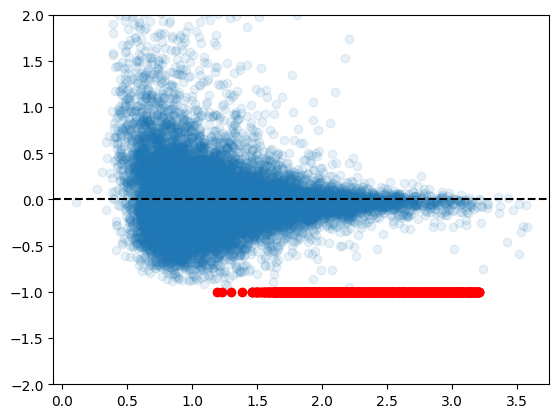

In [ ]:
plt.scatter(np.log10(snr), (pflux - tflux)/tflux, alpha=0.1)

mask = pflux == 0
plt.scatter(np.log10(snr[mask]), (pflux[mask] - tflux[mask])/tflux[mask], alpha=1, color='r')
plt.axhline(0.0, linestyle='--', color='k')
plt.ylim(-2, 2)

In [ ]:
sum((pflux==0) & (tflux > 0))

tensor(793)

(array([  4.,  27.,  88., 110., 126., 102.,  94.,  83.,  87.,  72.]),
 array([4.6801362 , 4.89701653, 5.11389685, 5.33077717, 5.54765749,
        5.76453781, 5.98141766, 6.19829798, 6.4151783 , 6.63205862,
        6.84893894]),
 <BarContainer object of 10 artists>)

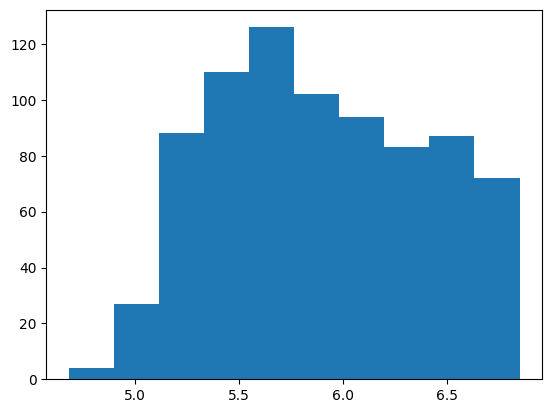

In [ ]:
plt.hist(tflux[mask].log10())

(array([  0.,   0.,   0.,   0.,   0., 793.,   0.,   0.,   0.,   0.]),
 array([-1.        , -0.80000001, -0.60000002, -0.40000001, -0.2       ,
         0.        ,  0.2       ,  0.40000001,  0.60000002,  0.80000001,
         1.        ]),
 <BarContainer object of 10 artists>)

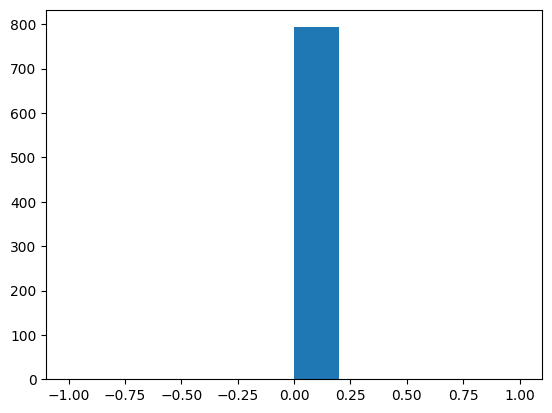

In [ ]:
plt.hist(pellips[:,0][mask], range=(-1, 1))

In [ ]:
tellips = d['residuals']['true_ellips']
pellips = d['residuals']['est_ellips']

In [ ]:
mask.shape

torch.Size([17206])

(-12.0, 12.0)

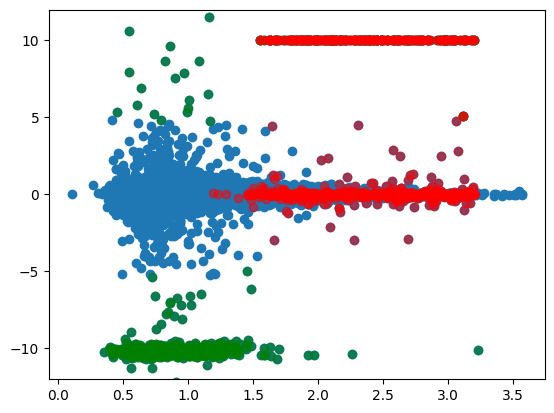

In [ ]:
te1 = tellips[:, 0]
pe1 = pellips[:, 0]
mask2 = (np.abs(te1) > 5) | (np.abs(pe1) > 5)

plt.scatter(np.log10(snr), pe1 - te1)
plt.scatter(np.log10(snr)[mask2], pe1[mask2] - te1[mask2], color='g', alpha=0.5)
plt.scatter(np.log10(snr)[mask], pe1[mask] - te1[mask], color='r', alpha=0.5)
plt.ylim(-12, 12)


(array([  0.,   0., 196.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([-12.        , -11.03999996, -10.07999992,  -9.11999989,
         -8.15999985,  -7.19999981,  -6.23999977,  -5.28000021,
         -4.32000017,  -3.3599999 ,  -2.4000001 ,  -1.44000006,
         -0.47999999,   0.47999999,   1.44000006,   2.4000001 ,
          3.3599999 ,   4.32000017,   5.28000021,   6.23999977,
          7.19999981,   8.15999985,   9.11999989,  10.07999992,
         11.03999996,  12.        ]),
 <BarContainer object of 25 artists>)

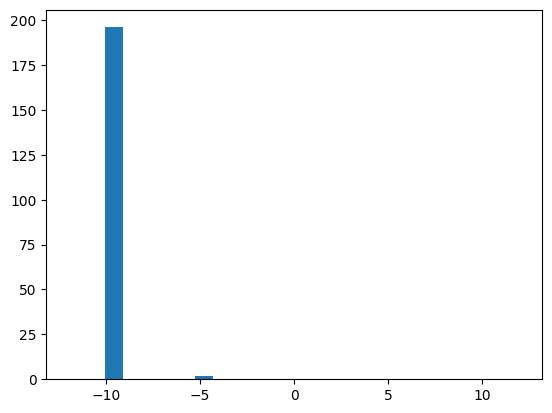

In [ ]:
plt.hist(te1[(np.abs(te1) > 5)], range=(-12, 12), bins=25)

(array([555.,   7.,  12.,   0.,   0.,   0.,   0.,  10.,   6.,   2.]),
 array([-12.        ,  -9.60000038,  -7.19999981,  -4.80000019,
         -2.4000001 ,   0.        ,   2.4000001 ,   4.80000019,
          7.19999981,   9.60000038,  12.        ]),
 <BarContainer object of 10 artists>)

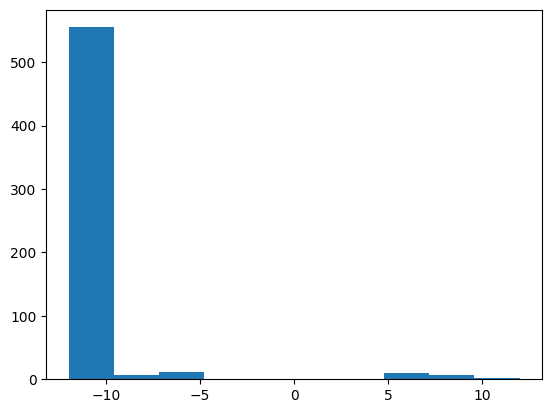

In [ ]:
plt.hist(pe1[(np.abs(pe1) > 5)], range=(-12, 12))

(array([  0.,   0.,   0.,   0.,   0., 200.,   0.,   0.,   0.,   0.]),
 array([-0.5       , -0.40000001, -0.30000001, -0.2       , -0.1       ,
         0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ]),
 <BarContainer object of 10 artists>)

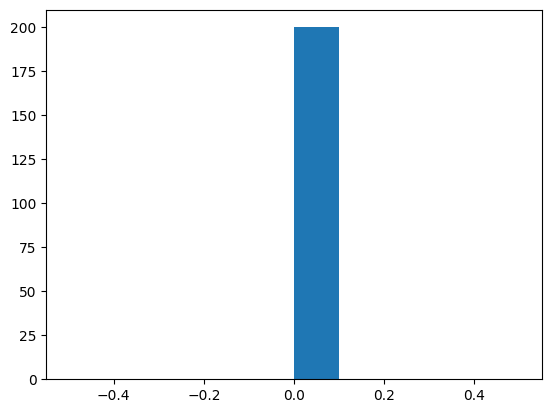

In [ ]:
plt.hist(pflux[(np.abs(te1) > 5)])

(-12.0, 12.0)

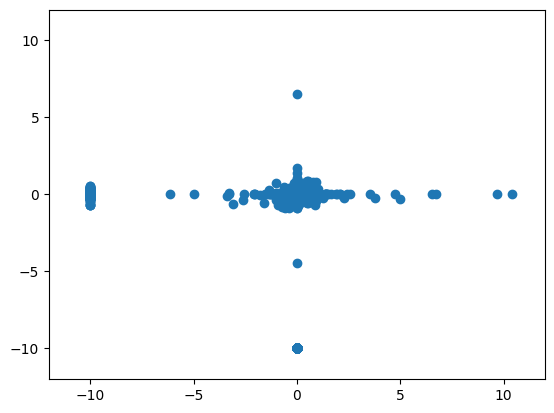

In [ ]:
plt.scatter(pellips[:, 1], tellips[:, 1])
plt.ylim(-12, 12)
plt.xlim(-12, 12)

(-12.0, 12.0)

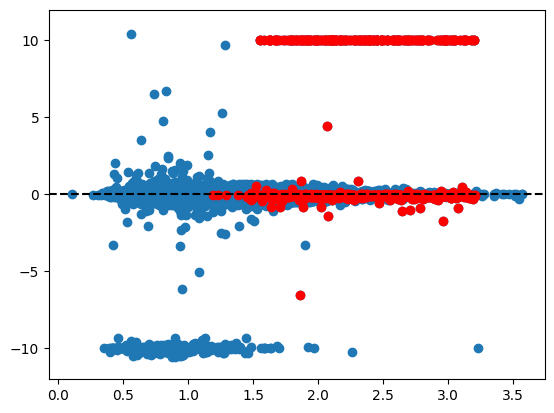

In [ ]:
plt.scatter(np.log10(snr), pellips[:, 1] - tellips[:, 1])
plt.scatter(np.log10(snr)[mask], pellips[:, 1][mask] - tellips[:, 1][mask], color='r')

plt.axhline(0.0, color='k', linestyle='--')
plt.ylim(-12, 12)

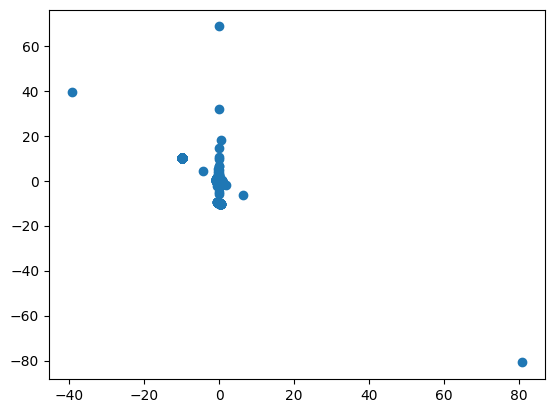

In [ ]:
plt.scatter(tellips[:, 1], pellips[:, 1] - tellips[:, 1])
